# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



#### 0 - Preprocessing
*This is just taken from our Assignment 2 with some minor tweaks.*

In [143]:
import pandas as pd
import sklearn as sk

**Utility Functions**

In [144]:
# Utility function - Rename the columns to be more descriptive
def rename_columns(data : pd.DataFrame) -> pd.DataFrame:
    # ? Renaming the columns for the TV2 answers.
    # So the names are easier to understand and work with.
    tv2_original_columns = ['1a','1b','2a','2b','3a','3b','4a','4b',
                            '5a','5b','6a','6b','7a','7b','8a','8b',
                            '9a','9b','10a','10b','11a','11b','12a','12b']
    tv2_new_columns = ['TV2-1a','TV2-1b','TV2-2a','TV2-2b','TV2-3a','TV2-3b','TV2-4a','TV2-4b',
                       'TV2-5a','TV2-5b','TV2-6a','TV2-6b','TV2-7a','TV2-7b','TV2-8a','TV2-8b',
                       'TV2-9a','TV2-9b','TV2-10a','TV2-10b','TV2-11a','TV2-11b','TV2-12a','TV2-12b']
    
    # ? Renaming the columns for the DR answers.
    # So the names are easier to understand and work with.
    dr_orignal_columns = ['530','531','533','534','535','537','538','540','541','543','544','545','546','547','548',
                          '550','551','552','553','555','556','557','559','561','563']
    
    dr_new_columns =  ['DR-1','DR-2','DR-3','DR-4','DR-5','DR-6','DR-7','DR-8','DR-9','DR-10','DR-11','DR-12','DR-13','DR-14','DR-15',
                       'DR-16','DR-17','DR-18','DR-19','DR-20','DR-21','DR-22','DR-23','DR-24','DR-25']

    other_columns_original = ['navn','alder','parti','storkreds']
    other_columns_new = ['Name','Age','Party','District']

    # ! Renaming the actual columns
    data.rename(columns=dict(zip(tv2_original_columns, tv2_new_columns)), inplace=True)
    data.rename(columns=dict(zip(dr_orignal_columns, dr_new_columns)), inplace=True)
    data.rename(columns=dict(zip(other_columns_original, other_columns_new)), inplace=True)
    return data

# Utility function - Set the column order to be more intuitive
def reorder_columns(data : pd.DataFrame) -> pd.DataFrame:
    # ? Reordering the columns
    # So the columns are easier to understand and work with.
    strict_column_order = ['Name','Age','Party','District'];
    remaining_columns = [col for col in data.columns if col not in strict_column_order]
    data = data[strict_column_order + remaining_columns]
    return data

**Load data from '00 - Data' folder**

In [145]:
# - Load the raw data from the file 'alldata.xlsx' into a pandas dataframe.
raw_data = pd.read_excel('00 - Data/alldata.xlsx')

# * Create a DataFrame
raw_dataFrame = pd.DataFrame(raw_data)

# ! Renaming the columns
clean_data = rename_columns(raw_dataFrame)

# ! Reordering the columns
clean_data = reorder_columns(raw_dataFrame)

# ? Cleaning party names
clean_data['Party'] = clean_data['Party'].replace('Frie Grønne, Danmarks Nye Venstrefløjsparti', 'Frie Grønne')


# * Preview the cleaned DataFrame
preview_dataFrame = clean_data.head(5)
preview_dataFrame = preview_dataFrame.style.set_caption('Preview of the cleaned DataFrame.')
preview_dataFrame = preview_dataFrame.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
preview_dataFrame = preview_dataFrame.set_properties(**{'text-align': 'center'})

display(preview_dataFrame.hide())

Name,Age,Party,District,DR-1,DR-2,DR-3,DR-4,DR-5,DR-6,DR-7,DR-8,DR-9,DR-10,DR-11,DR-12,DR-13,DR-14,DR-15,DR-16,DR-17,DR-18,DR-19,DR-20,DR-21,DR-22,DR-23,DR-24,DR-25,TV2-1a,TV2-1b,TV2-2a,TV2-2b,TV2-3a,TV2-3b,TV2-4a,TV2-4b,TV2-5a,TV2-5b,TV2-6a,TV2-6b,TV2-7a,TV2-7b,TV2-8a,TV2-8b,TV2-9a,TV2-9b,TV2-10a,TV2-10b,TV2-11a,TV2-11b,TV2-12a,TV2-12b
Lars Philipsen Prahm,78,Moderaterne,Københavns Storkreds,-1,-2,1,-2,2,1,-2,1,1,2,-2,1,2,2,1,-2,1,2,-2,2,2,1,2,2,-2,0,0,2,2,2,-2,-1,0,-1,1,-1,1,2,2,1,0,2,0,1,-2,-2,1,1,1
Karsten Hønge,64,Socialistisk Folkeparti,Fyns Storkreds,2,2,-1,-2,-1,-2,1,-2,2,-2,2,-1,-2,-2,2,2,-2,1,1,-1,-2,1,2,1,2,1,1,1,1,1,2,2,2,-2,0,1,-2,-2,0,0,0,-2,0,-1,2,1,-2,0,0
Martin Kelleher-Petersen,37,Alternativet,Bornholms Storkreds,2,1,-2,-2,1,-2,1,-1,1,-1,2,-2,-2,-1,1,1,-2,2,-1,-2,-1,1,2,2,2,1,1,1,2,1,1,2,0,-1,1,2,-2,-2,-2,1,1,-1,-2,0,2,0,-1,1,-2
Nicklas Gjedsig Larsen,28,Alternativet,Nordjyllands Storkreds,2,1,-2,-1,1,1,1,1,1,-2,2,1,1,-2,2,2,-2,2,1,2,-2,2,2,2,2,2,2,2,2,0,2,0,2,-2,2,-1,2,0,-2,2,2,-2,2,2,2,2,-1,2,0
Tom Gillesberg,58,Løsgænger,Københavns Storkreds,1,1,-2,2,-2,1,-2,1,2,-2,-2,2,2,-2,2,1,-2,2,-2,-2,-1,1,-2,-1,-2,-2,-2,0,0,-2,-2,2,1,-2,2,1,-2,2,-2,1,0,-2,0,-1,0,-2,0,2,-2


## YOUR TASK

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

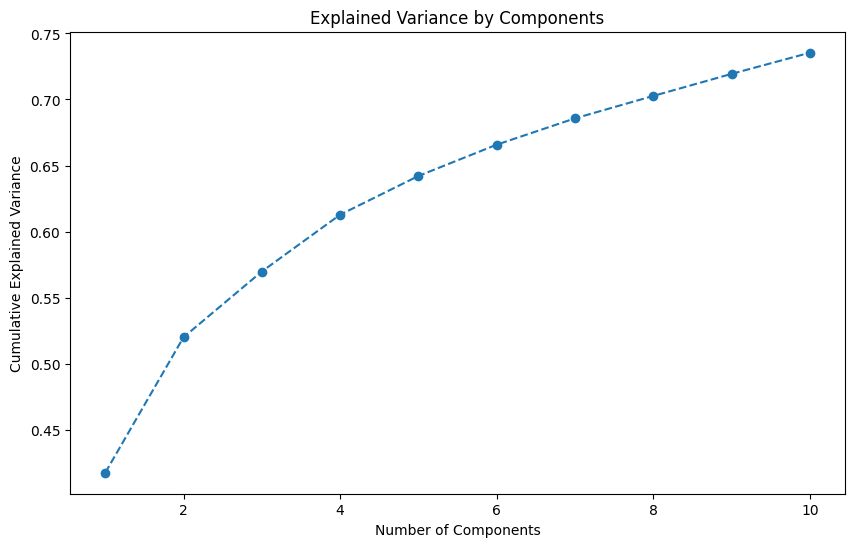

array([0.41737636, 0.10259865, 0.04976012, 0.04300921, 0.02932286,
       0.02369926, 0.01994354, 0.01696545, 0.01669215, 0.01604104])

In [146]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'clean_data' is your DataFrame
# First, let's check if all columns to be dropped are present in the DataFrame
drop_columns = ['Name', 'Age', 'Party', 'District']
for col in drop_columns:
    if col not in clean_data.columns:
        raise ValueError(f"Column {col} not found in DataFrame.")

# Standardize the data excluding non-numeric or identifier columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(clean_data.drop(drop_columns, axis=1))

# Apply PCA
pca = PCA(n_components=10)  # You can adjust this based on the scree plot outcome
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

# Plot the explained variance ratio for each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# - Show the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

display(explained_variance_ratio)

# Analyze loadings for the first few components
loadings = pd.DataFrame(pca.components_, columns=clean_data.drop(drop_columns, axis=1).columns)

C:\Users\madsh\AppData\Local\Temp\ipykernel_57152\683208090.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (component_1[i], component_2[i]))  # Annotate each point with variable name


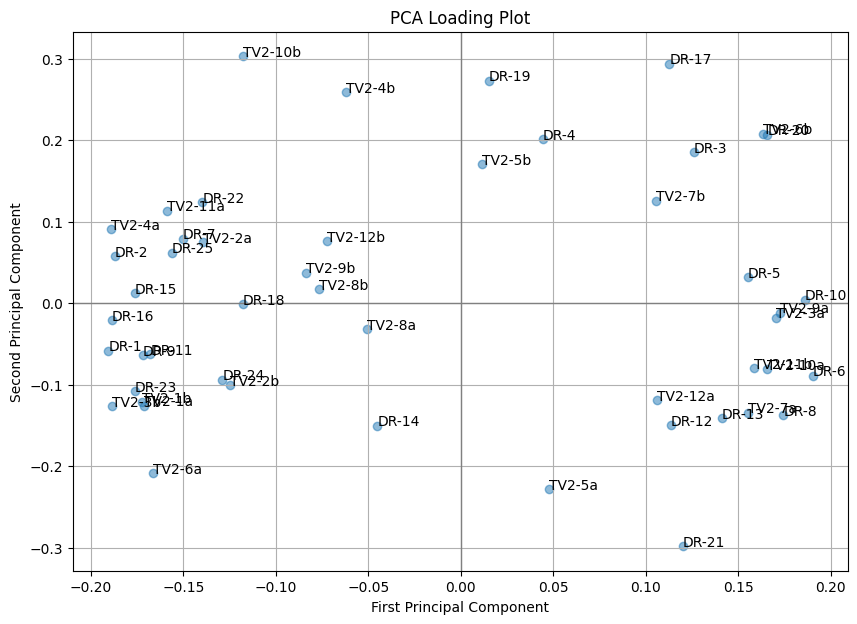

In [147]:
import matplotlib.pyplot as plt

# Correcting how we access the data for the first two components
component_1 = loadings.iloc[0]  # First principal component loadings
component_2 = loadings.iloc[1]  # Second principal component loadings

plt.figure(figsize=(10, 7))
plt.scatter(component_1, component_2, alpha=0.5)  # Plot loadings for first two components
for i, txt in enumerate(loadings.columns):
    plt.annotate(txt, (component_1[i], component_2[i]))  # Annotate each point with variable name
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Loading Plot')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)
plt.show()


In [148]:
# Assuming 'loadings' is already a DataFrame of PCA loadings
# Convert loadings to absolute values to consider both positive and negative contributions
absolute_loadings = loadings.abs()

# Focus on the first principal component or the first few if you want a broader analysis
sorted_loadings_first = loadings.iloc[0].sort_values(key=abs, ascending=False)
sorted_loadings_second = loadings.iloc[1].sort_values(key=abs, ascending=False)

# Create DataFrame with the columns: 'Question', 'Loading', 'Absolute Loading'
crucial_questions_first_component = pd.DataFrame({
    'Question': sorted_loadings_first.index,
    'Loading': sorted_loadings_first.values,
    'Absolute Loading': sorted_loadings_first.abs().values
})

crucial_questions_second_component = pd.DataFrame({
    'Question': sorted_loadings_second.index,
    'Loading': sorted_loadings_second.values,
    'Absolute Loading': sorted_loadings_second.abs().values
})

# Print the most crucial questions for the first two components
print("Most crucial questions for the first principal component:")
print(crucial_questions_first_component.head(10))  # Adjust number as needed

print("\nMost crucial questions for the second principal component:")
print(crucial_questions_second_component.head(10))  # Adjust number as needed


Most crucial questions for the first principal component:
  Question   Loading  Absolute Loading
0     DR-1 -0.190641          0.190641
1     DR-6  0.190284          0.190284
2   TV2-4a -0.188849          0.188849
3   TV2-3b -0.188778          0.188778
4    DR-16 -0.188555          0.188555
5     DR-2 -0.187016          0.187016
6    DR-10  0.185893          0.185893
7    DR-15 -0.176281          0.176281
8    DR-23 -0.176279          0.176279
9     DR-8  0.174404          0.174404

Most crucial questions for the second principal component:
  Question   Loading  Absolute Loading
0  TV2-10b  0.302917          0.302917
1    DR-21 -0.297978          0.297978
2    DR-17  0.293836          0.293836
3    DR-19  0.272805          0.272805
4   TV2-4b  0.258449          0.258449
5   TV2-5a -0.228295          0.228295
6   TV2-6a -0.208141          0.208141
7   TV2-6b  0.207707          0.207707
8    DR-20  0.206749          0.206749
9     DR-4  0.201449          0.201449
